In [21]:
%load_ext autoreload
%autoreload 2

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [23]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [24]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [25]:
from llm_toolkit.logical_reasoning_utils import *

In [26]:
model_name = "Qwen2.5-3B-Instruct"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [27]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 34 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   text                                                       3000 non-null   object
 1   label                                                      3000 non-null   object
 2   title                                                      3000 non-null   object
 3   puzzle                                                     3000 non-null   object
 4   truth                                                      3000 non-null   object
 5   Qwen/Qwen2.5-3B-Instruct_torch.float16_lf                  3000 non-null   object
 6   Qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.float16_lf    3000 non-null   object
 7   Qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.float16_lf    3000 non-null   object
 8   Qwen/Qwen2.5-3B-In

In [28]:
columns = df.columns.to_list()
df_float16 = df[columns[:16]]

df = df[columns[:5] + columns[16:]]
df.columns.to_list(), df_float16.columns.to_list()

(['text',
  'label',
  'title',
  'puzzle',
  'truth',
  'Qwen/Qwen2.5-3B-Instruct/shots-00',
  'Qwen/Qwen2.5-3B-Instruct/shots-05',
  'Qwen/Qwen2.5-3B-Instruct/shots-10',
  'Qwen/Qwen2.5-3B-Instruct/shots-20',
  'Qwen/Qwen2.5-3B-Instruct/shots-30',
  'Qwen/Qwen2.5-3B-Instruct/shots-40',
  'Qwen/Qwen2.5-3B-Instruct/shots-50',
  'Qwen/Qwen2.5-3B-Instruct_torch.bfloat16_lf',
  'Qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.bfloat16_lf',
  'Qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.bfloat16_lf',
  'Qwen/Qwen2.5-3B-Instruct/checkpoint-105_torch.bfloat16_lf',
  'Qwen/Qwen2.5-3B-Instruct/checkpoint-140_torch.bfloat16_lf',
  'Qwen/Qwen2.5-3B-Instruct/checkpoint-175_torch.bfloat16_lf',
  'Qwen/Qwen2.5-3B-Instruct/checkpoint-210_torch.bfloat16_lf',
  'Qwen/Qwen2.5-3B-Instruct/checkpoint-245_torch.bfloat16_lf',
  'Qwen/Qwen2.5-3B-Instruct/checkpoint-280_torch.bfloat16_lf',
  'Qwen/Qwen2.5-3B-Instruct/checkpoint-315_torch.bfloat16_lf',
  'Qwen/Qwen2.5-3B-Instruct/checkpoint-350_torch.bfloat16_l

In [29]:
perf_df = get_metrics_df(df_float16)
perf_df

columns: ['Qwen/Qwen2.5-3B-Instruct_torch.float16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.float16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.float16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-105_torch.float16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-140_torch.float16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-175_torch.float16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-210_torch.float16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-245_torch.float16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-280_torch.float16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-315_torch.float16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-350_torch.float16_lf']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:504: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                model  \
0     0.0  Qwen2.5-3B-Instruct   
1     0.2  Qwen2.5-3B-Instruct   
2     0.4  Qwen2.5-3B-Instruct   
3     0.6  Qwen2.5-3B-Instruct   
4     0.8  Qwen2.5-3B-Instruct   
5     1.0  Qwen2.5-3B-Instruct   
6     1.2  Qwen2.5-3B-Instruct   
7     1.4  Qwen2.5-3B-Instruct   
8     1.6  Qwen2.5-3B-Instruct   
9     1.8  Qwen2.5-3B-Instruct   
10    2.0  Qwen2.5-3B-Instruct   

                                                  run  accuracy  precision  \
0           Qwen/Qwen2.5-3B-Instruct_torch.float16_lf  0.579667   0.696650   
1   Qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.f...  0.689000   0.745017   
2   Qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.f...  0.655667   0.759043   
3   Qwen/Qwen2.5-3B-Instruct/checkpoint-105_torch....  0.696333   0.755094   
4   Qwen/Qwen2.5-3B-Instruct/checkpoint-140_torch....  0.685333   0.754252   
5   Qwen/Qwen2.5-3B-Instruct/checkpoint-175_torch....  0.684667   0.756407   
6   Qwen/Qwen2.5-3B-Instruct/checkpoint-210_torch....  0.689667   0.769092   
7   Qwen/Qwen2.5-3B-Instruct/checkpoint-245_torch....  0.725667   0.775371   
8   Qwen/Qwen2.5-3B-Instruct/checkpoint-280_torch....  0.708000   0.765964   
9   Qwen/Qwen2.5-3B-Instruct/checkpoint-315_torch....  0.705667   0.771756   
10  Qwen/Qwen2.5-3B-Instruct/checkpoint-350_torch....  0.700333   0.769882   

      recall        f1  ratio_valid_classifications  
0   0.579667  0.550637                     1.000000  
1   0.689000  0.709114                     0.998667  
2   0.655667  0.693419                     1.000000  
3   0.696333  0.718443                     1.000000  
4   0.685333  0.712873                     1.000000  
5   0.684667  0.712568                     1.000000  
6   0.689667  0.720232                     1.000000  
7   0.725667  0.744039                     1.000000  
8   0.708000  0.729400                     1.000000  
9   0.705667  0.729818                     1.000000  
10  0.700333  0.726564                     1.000000

0.0: Qwen/Qwen2.5-3B-Instruct_torch.float16_lf
0.2: Qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.float16_lf
0.4: Qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.float16_lf
0.6: Qwen/Qwen2.5-3B-Instruct/checkpoint-105_torch.float16_lf
0.8: Qwen/Qwen2.5-3B-Instruct/checkpoint-140_torch.float16_lf
1.0: Qwen/Qwen2.5-3B-Instruct/checkpoint-175_torch.float16_lf
1.2: Qwen/Qwen2.5-3B-Instruct/checkpoint-210_torch.float16_lf
1.4: Qwen/Qwen2.5-3B-Instruct/checkpoint-245_torch.float16_lf
1.6: Qwen/Qwen2.5-3B-Instruct/checkpoint-280_torch.float16_lf
1.8: Qwen/Qwen2.5-3B-Instruct/checkpoint-315_torch.float16_lf
2.0: Qwen/Qwen2.5-3B-Instruct/checkpoint-350_torch.float16_lf


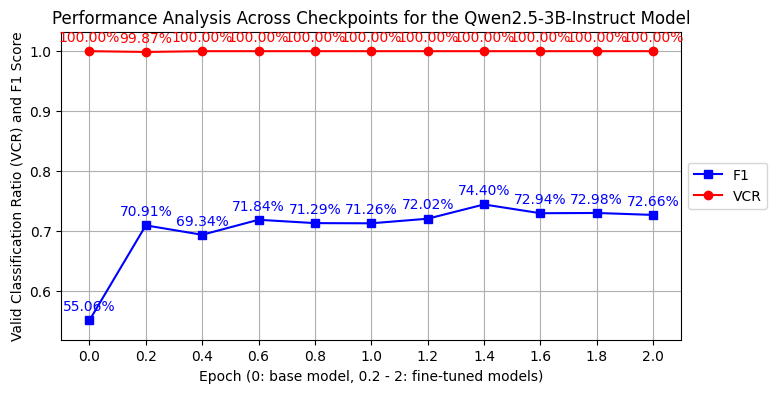

In [30]:
plot_metrics(perf_df, model_name)

In [31]:
perf_df = get_metrics_df(df)
perf_df

columns: ['Qwen/Qwen2.5-3B-Instruct_torch.bfloat16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.bfloat16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.bfloat16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-105_torch.bfloat16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-140_torch.bfloat16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-175_torch.bfloat16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-210_torch.bfloat16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-245_torch.bfloat16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-280_torch.bfloat16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-315_torch.bfloat16_lf', 'Qwen/Qwen2.5-3B-Instruct/checkpoint-350_torch.bfloat16_lf']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:504: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                model  \
0     0.0  Qwen2.5-3B-Instruct   
1     0.2  Qwen2.5-3B-Instruct   
2     0.4  Qwen2.5-3B-Instruct   
3     0.6  Qwen2.5-3B-Instruct   
4     0.8  Qwen2.5-3B-Instruct   
5     1.0  Qwen2.5-3B-Instruct   
6     1.2  Qwen2.5-3B-Instruct   
7     1.4  Qwen2.5-3B-Instruct   
8     1.6  Qwen2.5-3B-Instruct   
9     1.8  Qwen2.5-3B-Instruct   
10    2.0  Qwen2.5-3B-Instruct   

                                                  run  accuracy  precision  \
0          Qwen/Qwen2.5-3B-Instruct_torch.bfloat16_lf  0.568667   0.689063   
1   Qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.b...  0.677667   0.731627   
2   Qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.b...  0.665333   0.758959   
3   Qwen/Qwen2.5-3B-Instruct/checkpoint-105_torch....  0.696333   0.754235   
4   Qwen/Qwen2.5-3B-Instruct/checkpoint-140_torch....  0.700667   0.766133   
5   Qwen/Qwen2.5-3B-Instruct/checkpoint-175_torch....  0.695667   0.766521   
6   Qwen/Qwen2.5-3B-Instruct/checkpoint-210_torch....  0.683000   0.772847   
7   Qwen/Qwen2.5-3B-Instruct/checkpoint-245_torch....  0.723333   0.772099   
8   Qwen/Qwen2.5-3B-Instruct/checkpoint-280_torch....  0.715667   0.772427   
9   Qwen/Qwen2.5-3B-Instruct/checkpoint-315_torch....  0.698667   0.773405   
10  Qwen/Qwen2.5-3B-Instruct/checkpoint-350_torch....  0.704000   0.772594   

      recall        f1  ratio_valid_classifications  
0   0.568667  0.534342                        1.000  
1   0.677667  0.697367                        0.999  
2   0.665333  0.699720                        1.000  
3   0.696333  0.717679                        1.000  
4   0.700667  0.726397                        1.000  
5   0.695667  0.723276                        1.000  
6   0.683000  0.717283                        1.000  
7   0.723333  0.741048                        1.000  
8   0.715667  0.735633                        1.000  
9   0.698667  0.726272                        1.000  
10  0.704000  0.729034                        1.000

0.0: Qwen/Qwen2.5-3B-Instruct_torch.bfloat16_lf
0.2: Qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.bfloat16_lf
0.4: Qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.bfloat16_lf
0.6: Qwen/Qwen2.5-3B-Instruct/checkpoint-105_torch.bfloat16_lf
0.8: Qwen/Qwen2.5-3B-Instruct/checkpoint-140_torch.bfloat16_lf
1.0: Qwen/Qwen2.5-3B-Instruct/checkpoint-175_torch.bfloat16_lf
1.2: Qwen/Qwen2.5-3B-Instruct/checkpoint-210_torch.bfloat16_lf
1.4: Qwen/Qwen2.5-3B-Instruct/checkpoint-245_torch.bfloat16_lf
1.6: Qwen/Qwen2.5-3B-Instruct/checkpoint-280_torch.bfloat16_lf
1.8: Qwen/Qwen2.5-3B-Instruct/checkpoint-315_torch.bfloat16_lf
2.0: Qwen/Qwen2.5-3B-Instruct/checkpoint-350_torch.bfloat16_lf


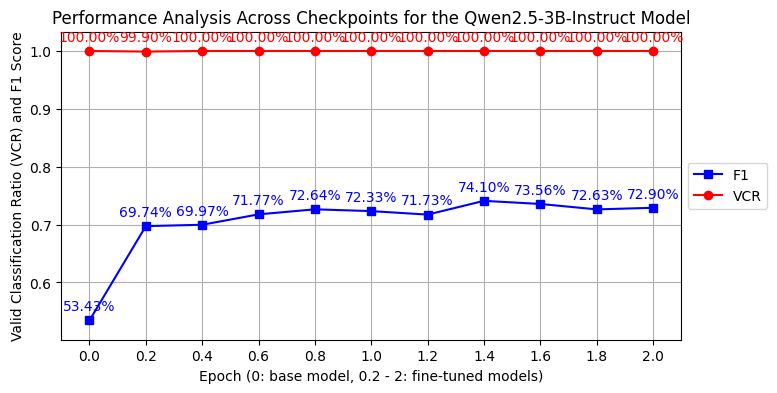

In [32]:
plot_metrics(perf_df, model_name)

In [33]:
perf_df.to_csv(metrics_csv, index=False)

In [34]:
perf_df_shots = get_metrics_df(df, variant="shots")
perf_df_shots

columns: ['Qwen/Qwen2.5-3B-Instruct/shots-00', 'Qwen/Qwen2.5-3B-Instruct/shots-05', 'Qwen/Qwen2.5-3B-Instruct/shots-10', 'Qwen/Qwen2.5-3B-Instruct/shots-20', 'Qwen/Qwen2.5-3B-Instruct/shots-30', 'Qwen/Qwen2.5-3B-Instruct/shots-40', 'Qwen/Qwen2.5-3B-Instruct/shots-50']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:504: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


shots                model                                run  accuracy  \
0     0  Qwen2.5-3B-Instruct  Qwen/Qwen2.5-3B-Instruct/shots-00  0.579667   
1     5  Qwen2.5-3B-Instruct  Qwen/Qwen2.5-3B-Instruct/shots-05  0.639000   
2    10  Qwen2.5-3B-Instruct  Qwen/Qwen2.5-3B-Instruct/shots-10  0.625000   
3    20  Qwen2.5-3B-Instruct  Qwen/Qwen2.5-3B-Instruct/shots-20  0.466667   
4    30  Qwen2.5-3B-Instruct  Qwen/Qwen2.5-3B-Instruct/shots-30  0.475000   
5    40  Qwen2.5-3B-Instruct  Qwen/Qwen2.5-3B-Instruct/shots-40  0.584000   
6    50  Qwen2.5-3B-Instruct  Qwen/Qwen2.5-3B-Instruct/shots-50  0.609333   

   precision    recall        f1  ratio_valid_classifications  
0   0.696650  0.579667  0.550637                     1.000000  
1   0.722643  0.639000  0.641569                     0.997333  
2   0.716415  0.625000  0.640258                     0.995000  
3   0.698764  0.466667  0.526507                     0.931667  
4   0.688099  0.475000  0.531095                     0.904000  
5   0.706530  0.584000  0.621499                     0.717333  
6   0.712051  0.609333  0.645196                     0.574000

0: Qwen/Qwen2.5-3B-Instruct/shots-00
5: Qwen/Qwen2.5-3B-Instruct/shots-05
10: Qwen/Qwen2.5-3B-Instruct/shots-10
20: Qwen/Qwen2.5-3B-Instruct/shots-20
30: Qwen/Qwen2.5-3B-Instruct/shots-30
40: Qwen/Qwen2.5-3B-Instruct/shots-40
50: Qwen/Qwen2.5-3B-Instruct/shots-50


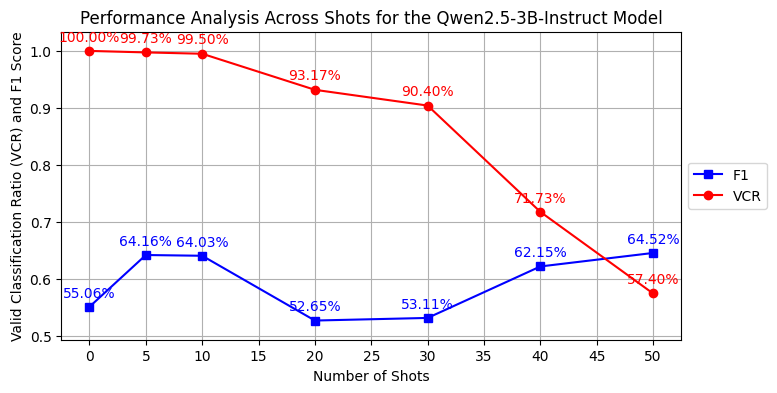

In [35]:
plot_metrics(perf_df_shots, model_name, variant="shots")

In [36]:
perf_df_shots.to_csv(
    metrics_csv.replace("metrics.csv", "shots_metrics.csv"), index=False
)

********** Qwen/Qwen2.5-3B-Instruct/shots-00 **********
Qwen/Qwen2.5-3B-Instruct/shots-00
不是      2327
是        386
问法错误     164
不重要       82
回答正确      41
Name: count, dtype: int64


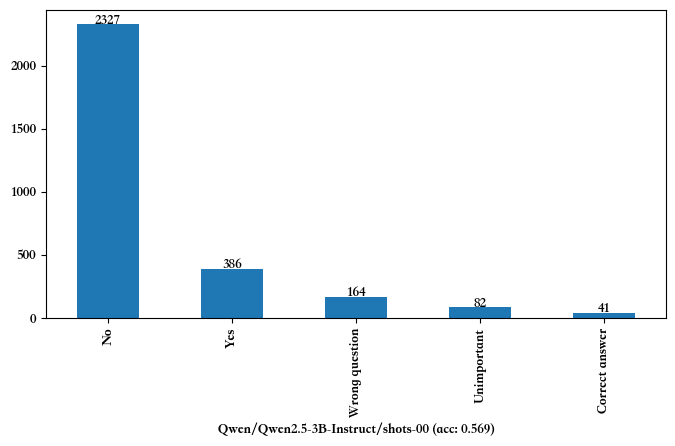

********** Qwen/Qwen2.5-3B-Instruct/shots-05 **********
Qwen/Qwen2.5-3B-Instruct/shots-05
不是      1913
是        619
不重要      287
回答正确     133
问法错误      40
有          2
有关系        2
回答错误       2
重要         1
是重要        1
Name: count, dtype: int64


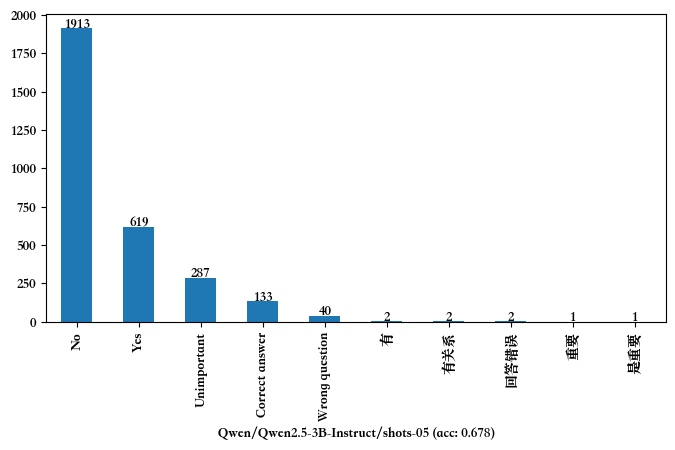

********** Qwen/Qwen2.5-3B-Instruct/shots-10 **********
Qwen/Qwen2.5-3B-Instruct/shots-10
不是       1768
是         693
不重要       386
回答正确      128
不是重要       10
问法错误       10
是重要         3
回答: 是       1
回答错误        1
Name: count, dtype: int64


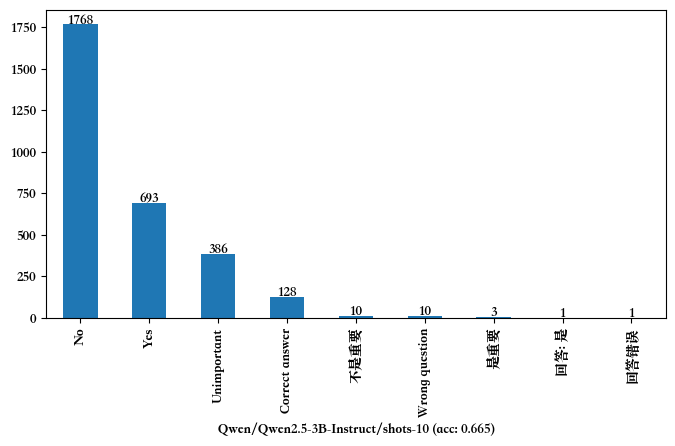

********** Qwen/Qwen2.5-3B-Instruct/shots-20 **********
Qwen/Qwen2.5-3B-Instruct/shots-20
不是          1275
不重要          781
是            472
回答正确         262
回答: 不重要      103
回答: 是         58
回答: 回答正确      23
回答: 问法错误      12
回答错误           7
问法错误           5
回答: 不是         2
Name: count, dtype: int64


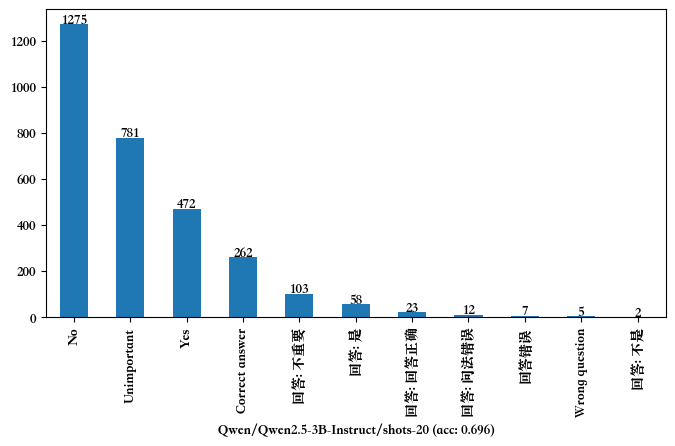

********** Qwen/Qwen2.5-3B-Instruct/shots-30 **********
Qwen/Qwen2.5-3B-Instruct/shots-30
不是                                                                                                                                                   1270
不重要                                                                                                                                                   586
是                                                                                                                                                     466
回答正确                                                                                                                                                  387
回答: 不重要                                                                                                                                               124
回答: 是                                                                                                                                       

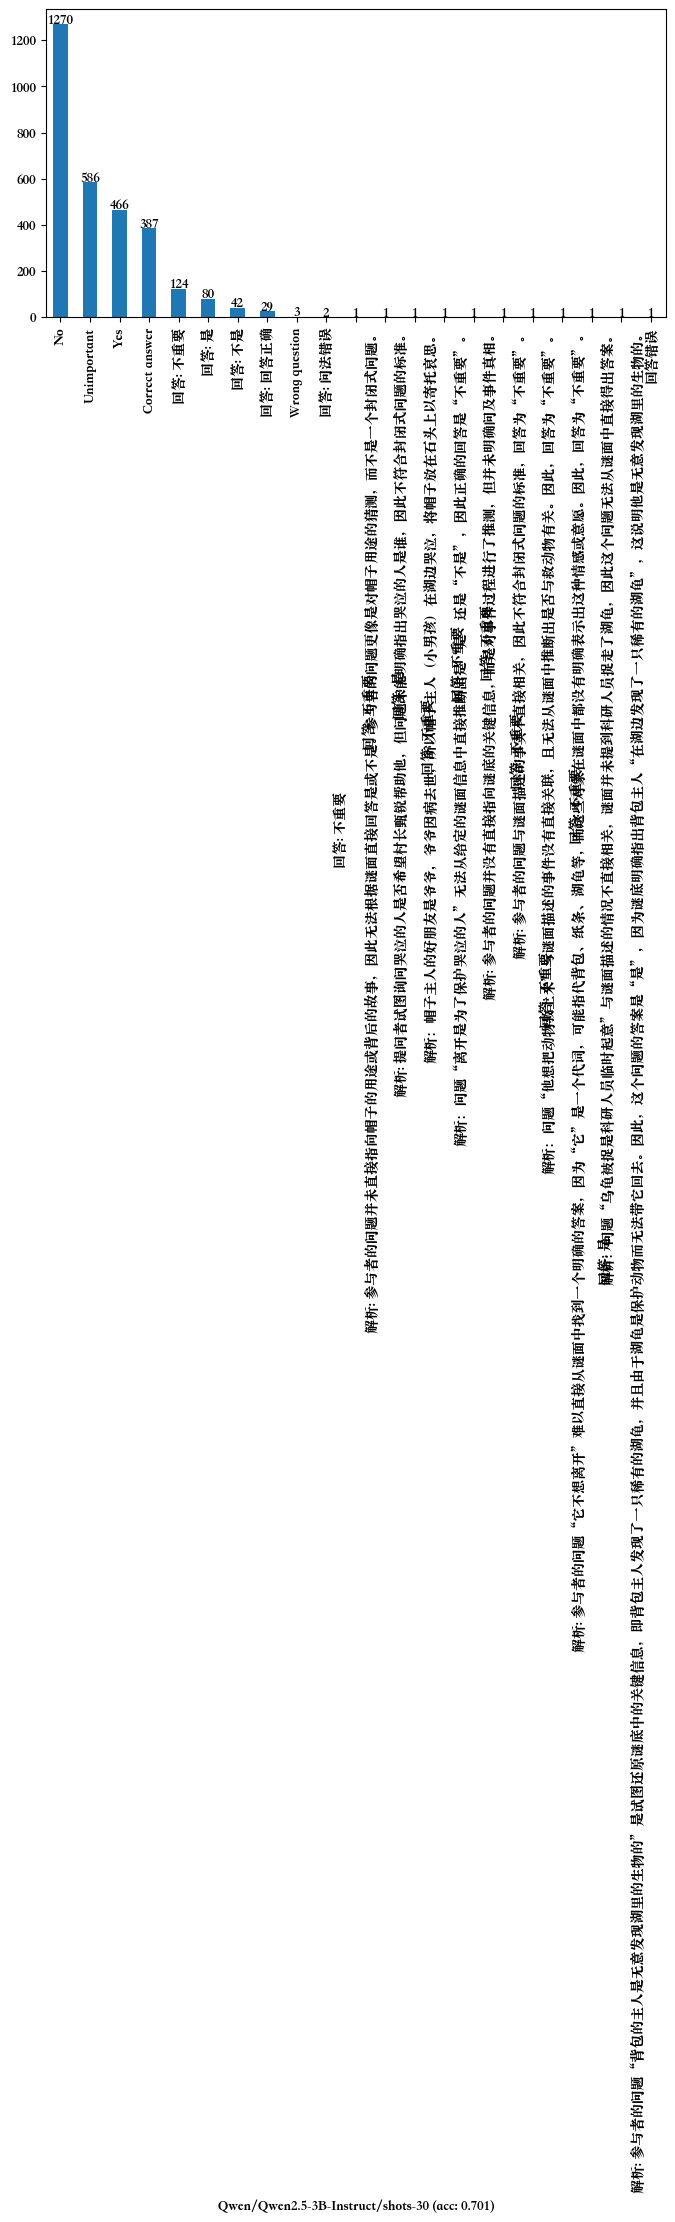

********** Qwen/Qwen2.5-3B-Instruct/shots-40 **********
Qwen/Qwen2.5-3B-Instruct/shots-40
不是                                                                                                            1198
是                                                                                                              470
不重要                                                                                                            327
回答: 是                                                                                                          237
回答: 不是                                                                                                         187
                                                                                                              ... 
回答: 不重要\n\n解析：问题“它以前就在这里”无法从现有信息中得出明确的“是”或“不是”答案，因为谜底中提到的是背包和纸条是“新的线索”，并没有说明它们之前是否就存在。                           1
回答: 不是\n\n解析：问题“主人失足落水与它有关”是一个开放性问题，没有直接指向谜面中的关键信息。因此，根据规则，回答应为“不重要”。                                    

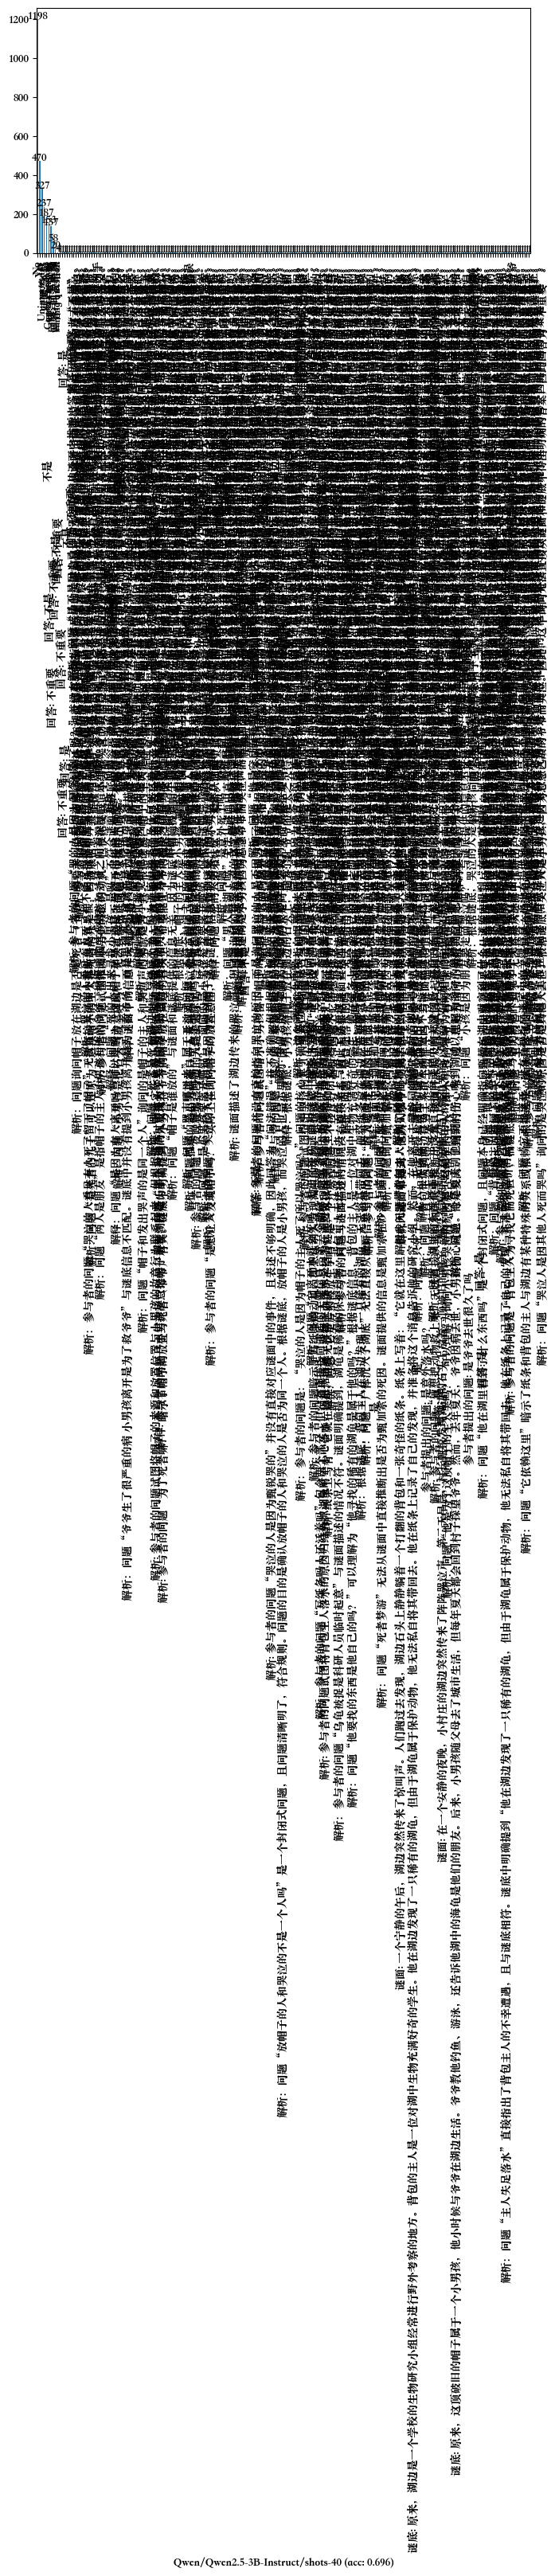

********** Qwen/Qwen2.5-3B-Instruct/shots-50 **********
Qwen/Qwen2.5-3B-Instruct/shots-50
不是                                                                           944
回答: 是                                                                        422
不重要                                                                          389
是                                                                            386
回答: 不是                                                                       260
                                                                            ... 
回答: 是\n\n参与者提出的问题: 帽子是他爷爷的\n回答: 是                                              1
回答: 不是\n\n解析: 谜面描述了帽子的来源和哭泣声的来源是不同的。帽子属于小男孩，而哭泣声是小男孩的。因此，帽子不是哭泣的人。             1
不是\n\n解析：问题“他家人是溺水了吗”与谜底无关，因为谜底中并未提及任何关于家人溺水的内容。参与者的问题偏离了谜底的真相，因此回答为“不是”。      1
回答: 不是\n\n解析: 谜面描述了湖边传来哭泣声，但并未提到哭泣声是捂嘴时死者发出的，因此这个问题与谜底无关。                      1
回答: 是\n\n参与者提出的问题: 有人在湖边哭泣\n回答: 回答正确                                           1
Name: count, Length

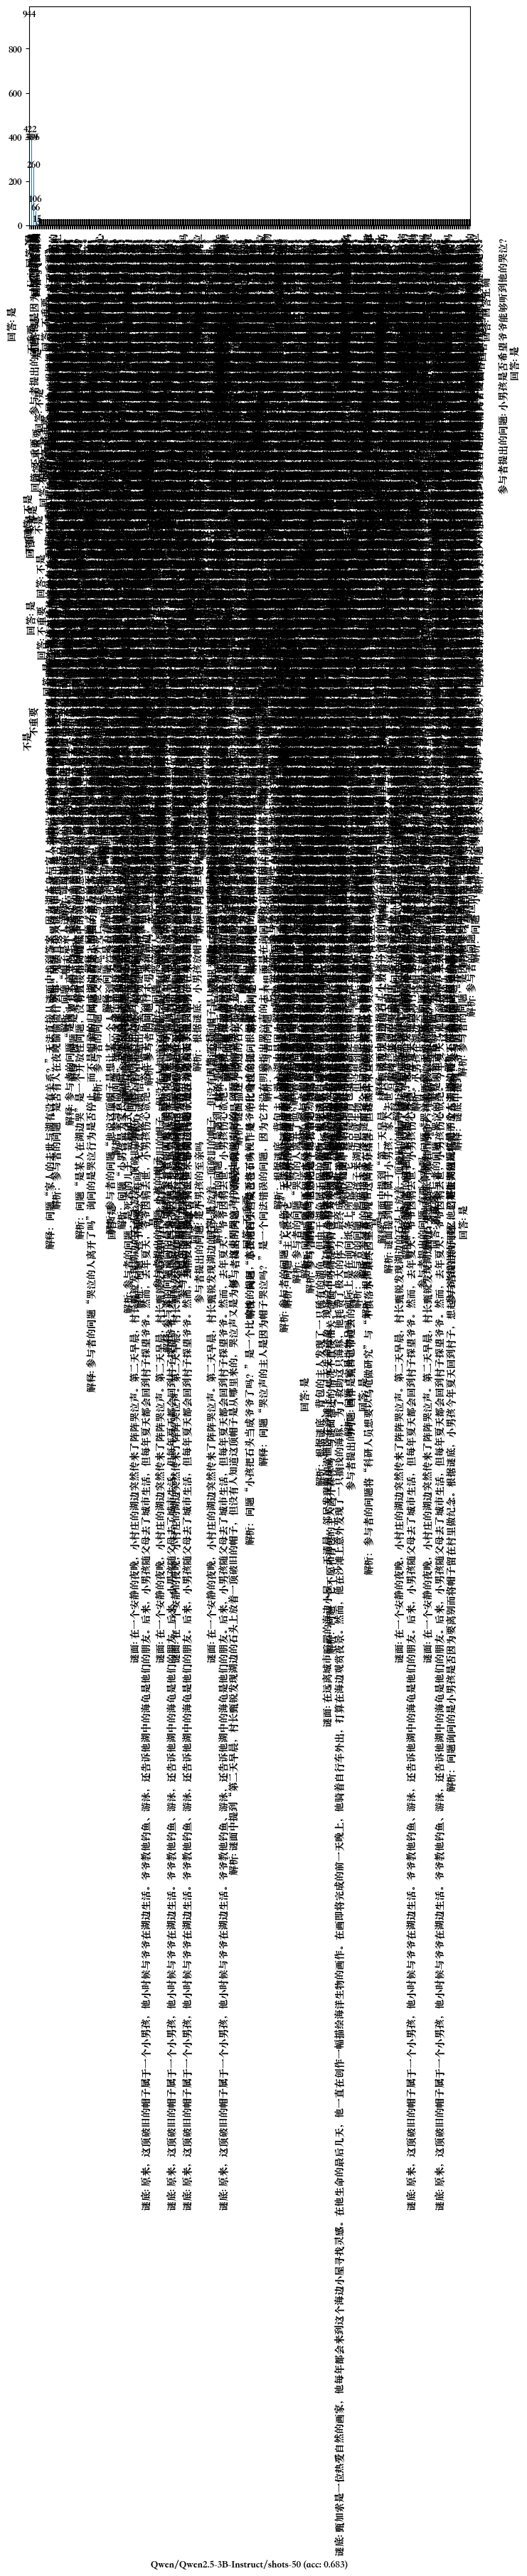

********** Qwen/Qwen2.5-3B-Instruct_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct_torch.bfloat16_lf
不是      2360
是        356
问法错误     165
不重要       75
回答正确      44
Name: count, dtype: int64


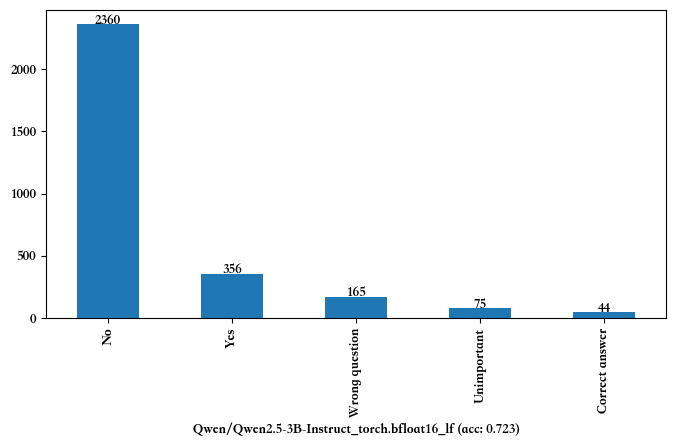

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.bfloat16_lf
不是                           1266
是                            1259
不重要                           433
回答正确                           30
问法错误                            9
是爷爷                             1
小男孩是那个每年夏天都会回到村子探望爷爷的小男孩。       1
小男孩                             1
Name: count, dtype: int64


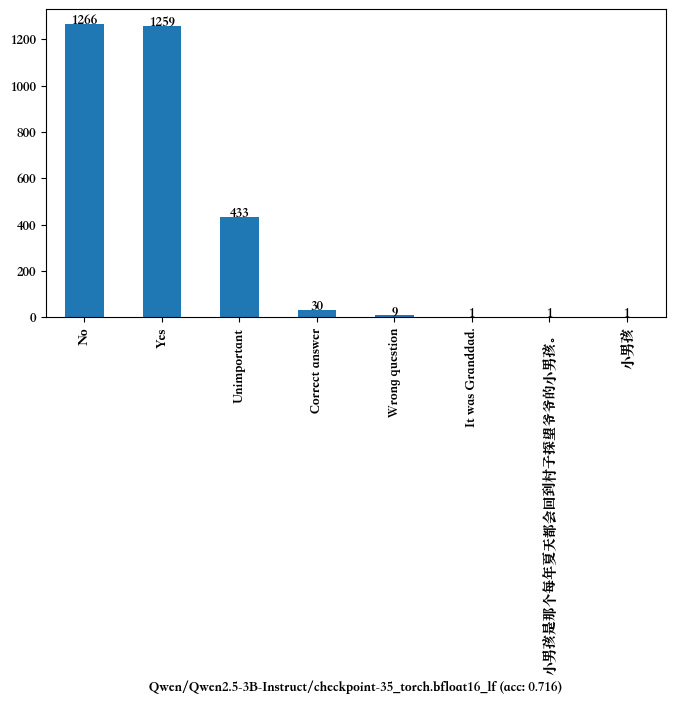

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.bfloat16_lf
不是      1327
是       1034
不重要      589
问法错误      27
回答正确      23
Name: count, dtype: int64


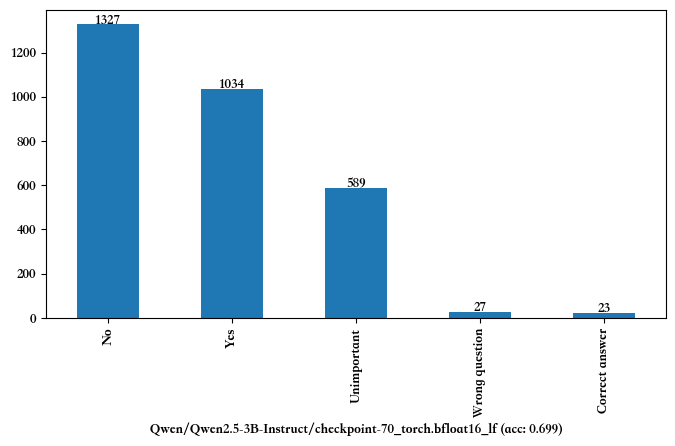

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-105_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-105_torch.bfloat16_lf
不是      1503
是       1015
不重要      411
问法错误      45
回答正确      26
Name: count, dtype: int64


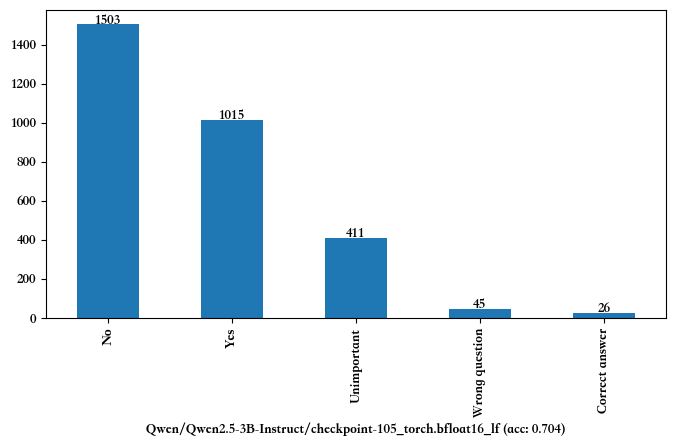

In [37]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

********** Qwen/Qwen2.5-3B-Instruct/shots-00 **********
Qwen/Qwen2.5-3B-Instruct/shots-00
不是      2327
是        386
问法错误     164
不重要       82
回答正确      41
Name: count, dtype: int64


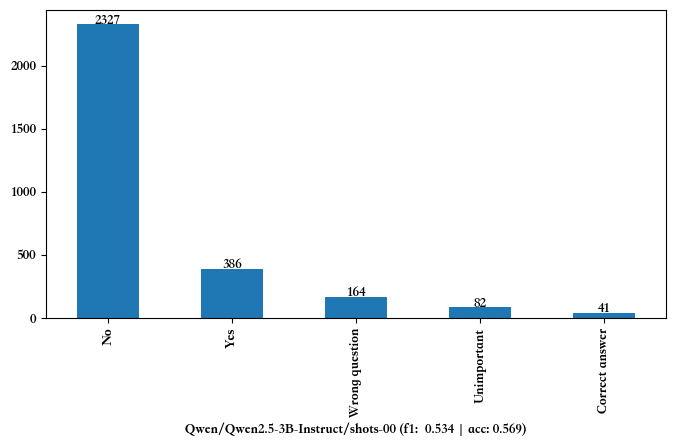

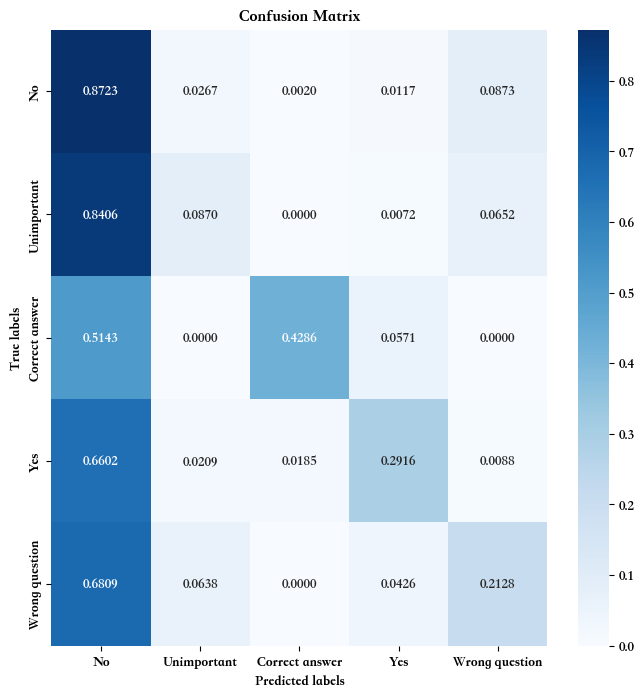

********** Qwen/Qwen2.5-3B-Instruct/shots-05 **********
Qwen/Qwen2.5-3B-Instruct/shots-05
不是      1913
是        619
不重要      287
回答正确     133
问法错误      40
有          2
有关系        2
回答错误       2
重要         1
是重要        1
Name: count, dtype: int64


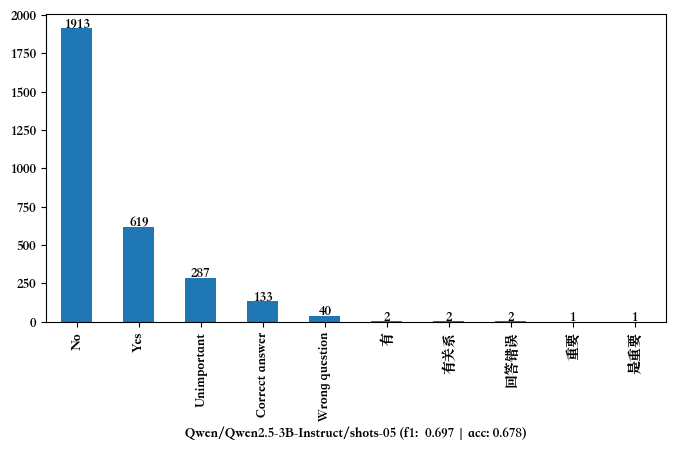

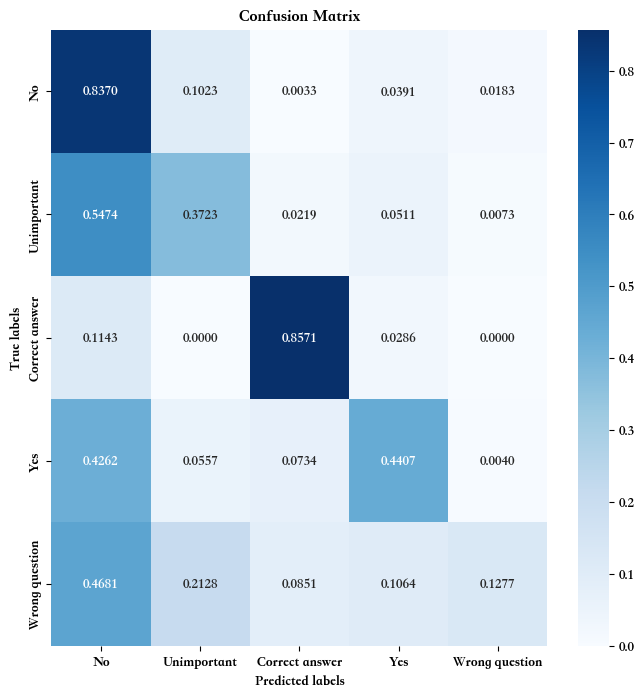

********** Qwen/Qwen2.5-3B-Instruct/shots-10 **********
Qwen/Qwen2.5-3B-Instruct/shots-10
不是       1768
是         693
不重要       386
回答正确      128
不是重要       10
问法错误       10
是重要         3
回答: 是       1
回答错误        1
Name: count, dtype: int64


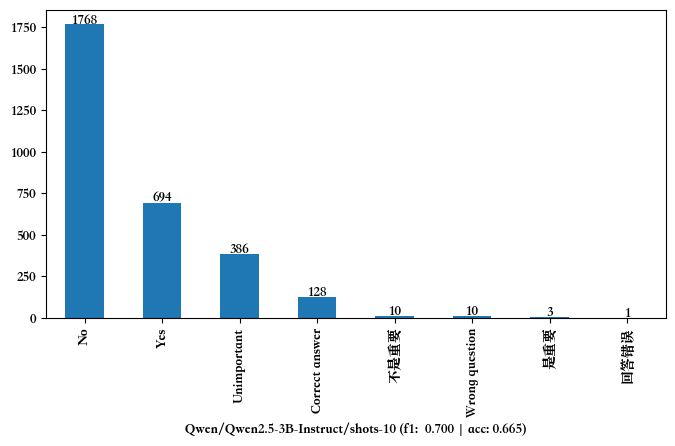

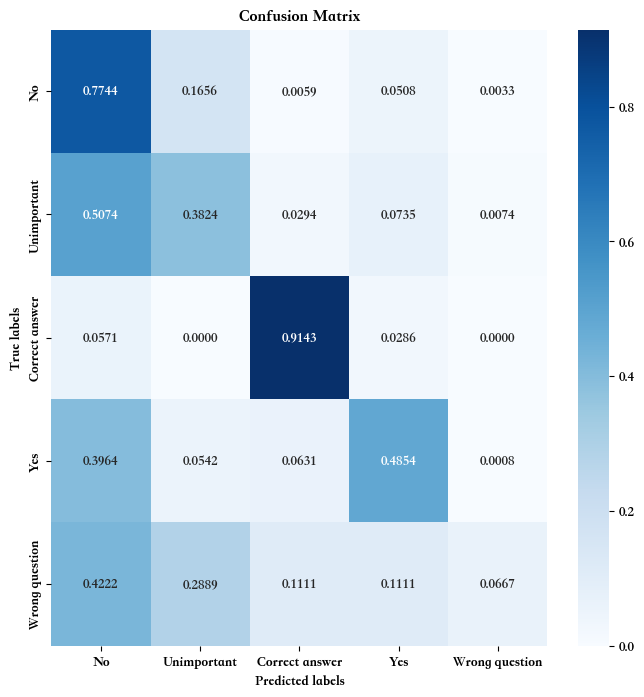

********** Qwen/Qwen2.5-3B-Instruct/shots-20 **********
Qwen/Qwen2.5-3B-Instruct/shots-20
不是          1275
不重要          781
是            472
回答正确         262
回答: 不重要      103
回答: 是         58
回答: 回答正确      23
回答: 问法错误      12
回答错误           7
问法错误           5
回答: 不是         2
Name: count, dtype: int64


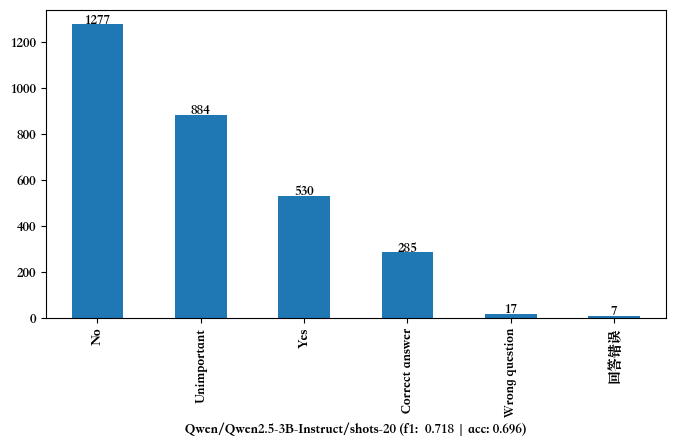

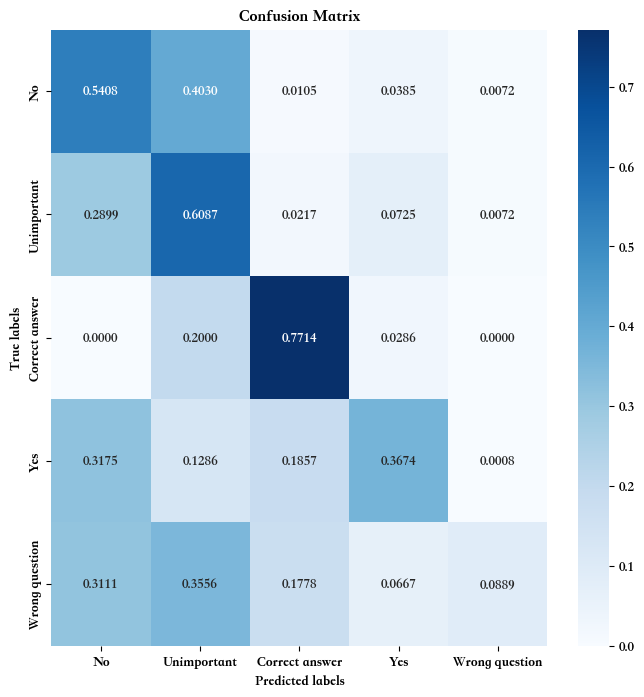

********** Qwen/Qwen2.5-3B-Instruct/shots-30 **********
Qwen/Qwen2.5-3B-Instruct/shots-30
不是                                                                                                                                                   1270
不重要                                                                                                                                                   586
是                                                                                                                                                     466
回答正确                                                                                                                                                  387
回答: 不重要                                                                                                                                               124
回答: 是                                                                                                                                       

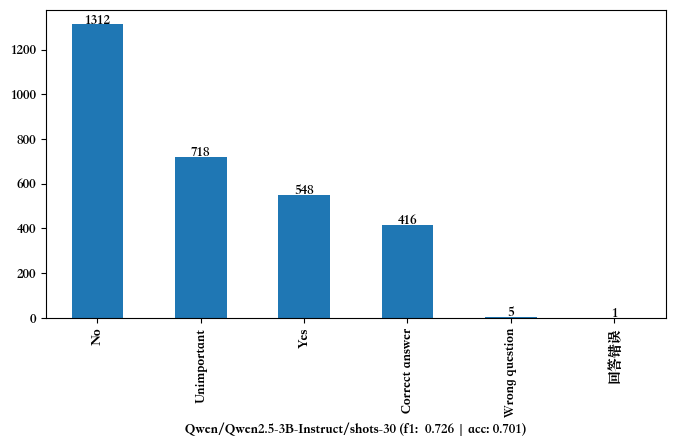

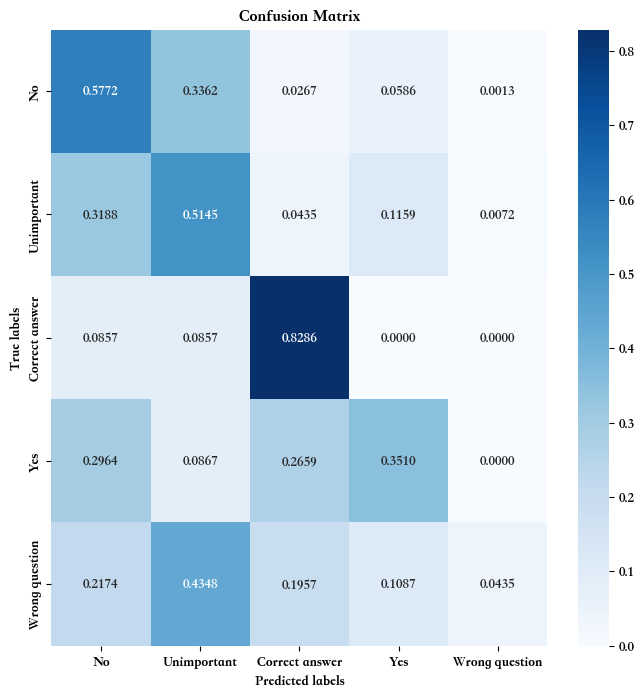

********** Qwen/Qwen2.5-3B-Instruct/shots-40 **********
Qwen/Qwen2.5-3B-Instruct/shots-40
不是                                                                                                            1198
是                                                                                                              470
不重要                                                                                                            327
回答: 是                                                                                                          237
回答: 不是                                                                                                         187
                                                                                                              ... 
回答: 不重要\n\n解析：问题“它以前就在这里”无法从现有信息中得出明确的“是”或“不是”答案，因为谜底中提到的是背包和纸条是“新的线索”，并没有说明它们之前是否就存在。                           1
回答: 不是\n\n解析：问题“主人失足落水与它有关”是一个开放性问题，没有直接指向谜面中的关键信息。因此，根据规则，回答应为“不重要”。                                    

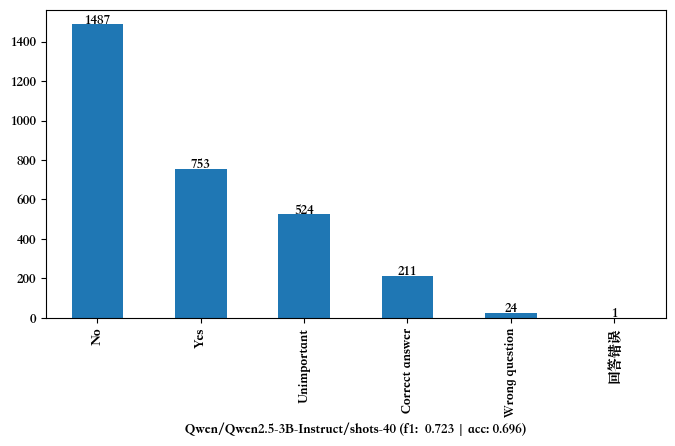

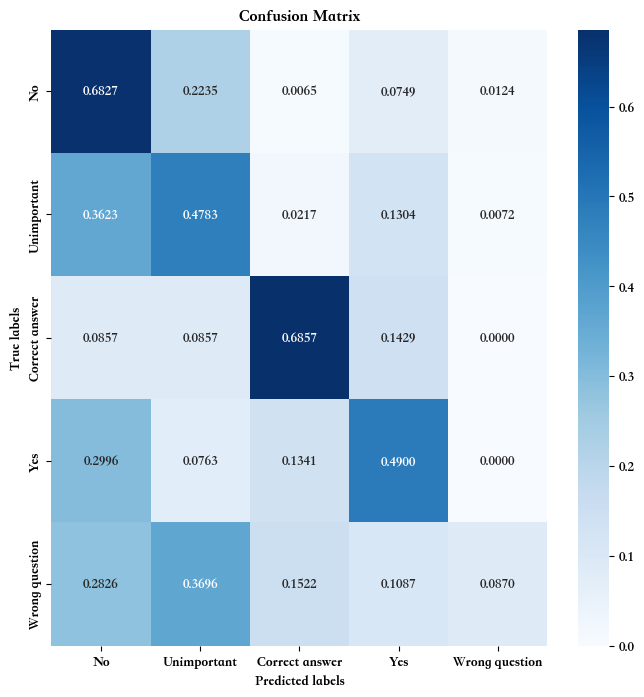

********** Qwen/Qwen2.5-3B-Instruct/shots-50 **********
Qwen/Qwen2.5-3B-Instruct/shots-50
不是                                                                           944
回答: 是                                                                        422
不重要                                                                          389
是                                                                            386
回答: 不是                                                                       260
                                                                            ... 
回答: 是\n\n参与者提出的问题: 帽子是他爷爷的\n回答: 是                                              1
回答: 不是\n\n解析: 谜面描述了帽子的来源和哭泣声的来源是不同的。帽子属于小男孩，而哭泣声是小男孩的。因此，帽子不是哭泣的人。             1
不是\n\n解析：问题“他家人是溺水了吗”与谜底无关，因为谜底中并未提及任何关于家人溺水的内容。参与者的问题偏离了谜底的真相，因此回答为“不是”。      1
回答: 不是\n\n解析: 谜面描述了湖边传来哭泣声，但并未提到哭泣声是捂嘴时死者发出的，因此这个问题与谜底无关。                      1
回答: 是\n\n参与者提出的问题: 有人在湖边哭泣\n回答: 回答正确                                           1
Name: count, Length

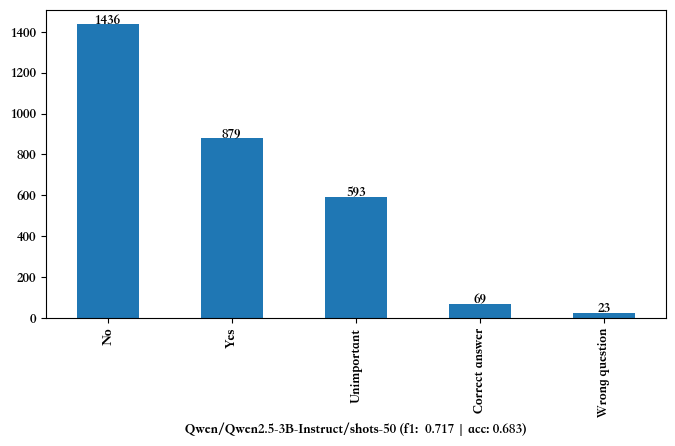

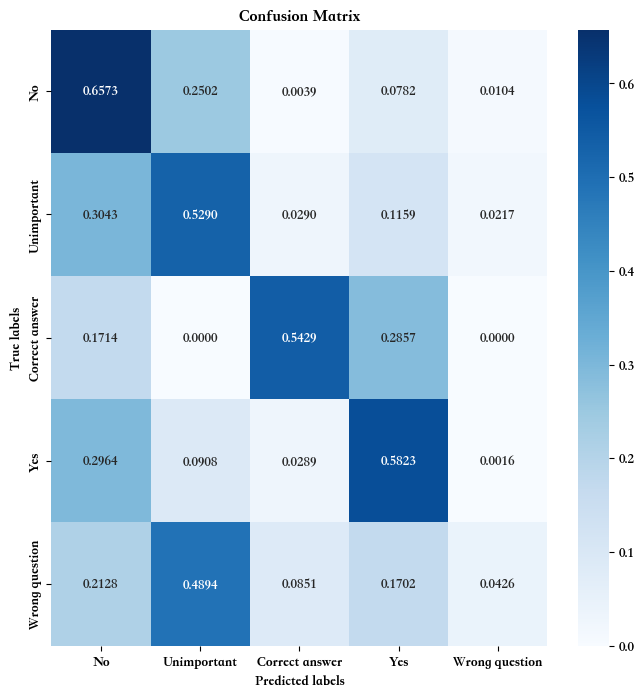

********** Qwen/Qwen2.5-3B-Instruct_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct_torch.bfloat16_lf
不是      2360
是        356
问法错误     165
不重要       75
回答正确      44
Name: count, dtype: int64


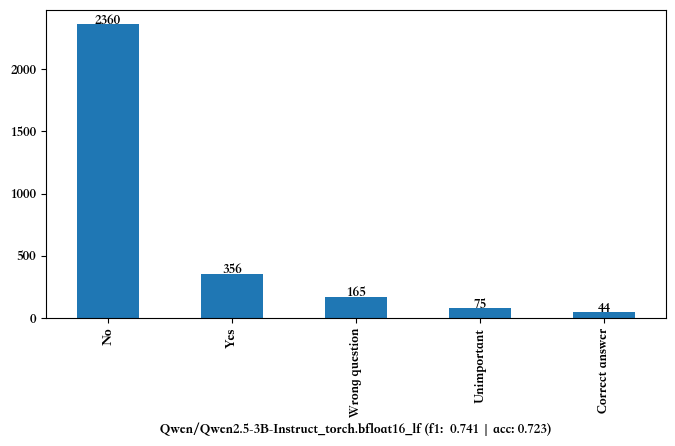

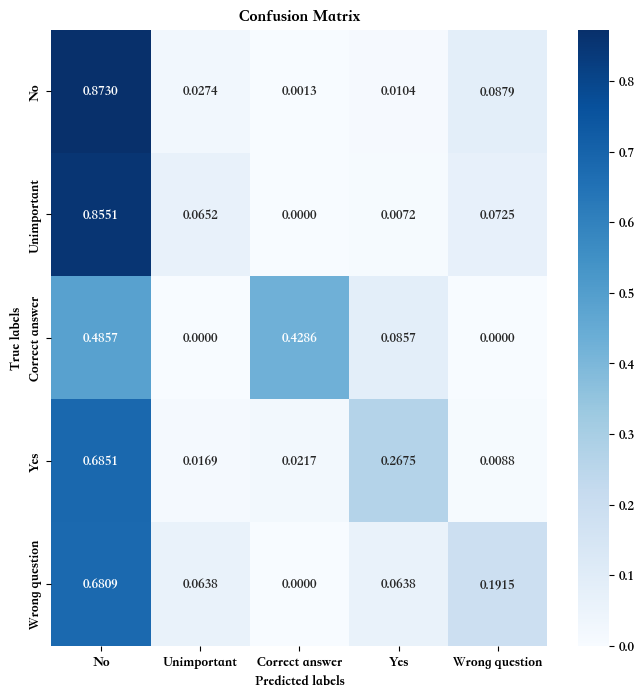

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.bfloat16_lf
不是                           1266
是                            1259
不重要                           433
回答正确                           30
问法错误                            9
是爷爷                             1
小男孩是那个每年夏天都会回到村子探望爷爷的小男孩。       1
小男孩                             1
Name: count, dtype: int64


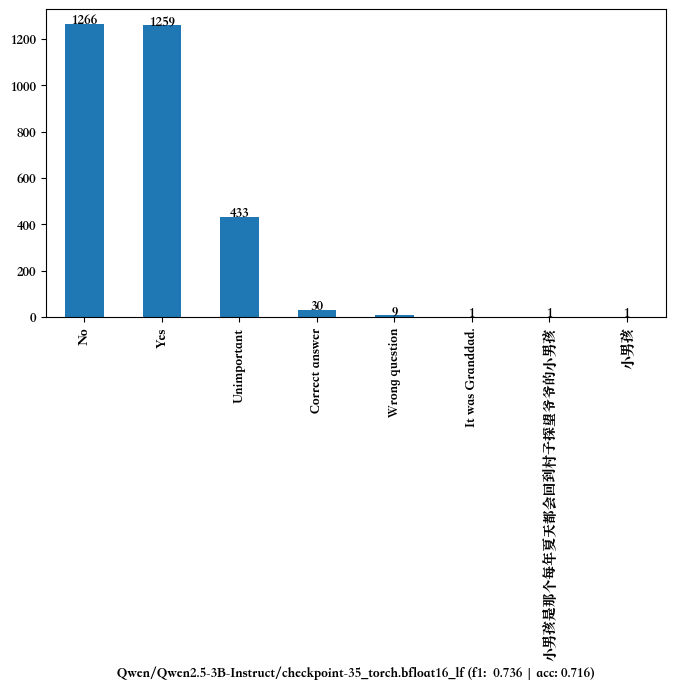

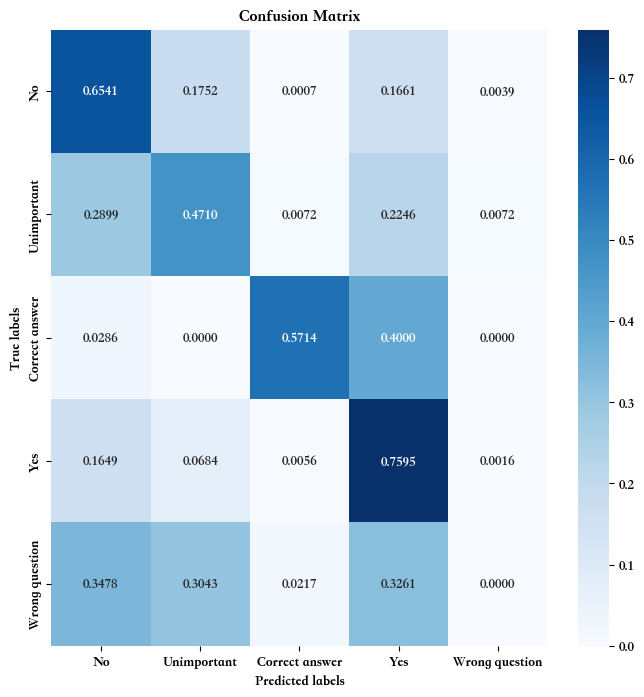

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.bfloat16_lf
不是      1327
是       1034
不重要      589
问法错误      27
回答正确      23
Name: count, dtype: int64


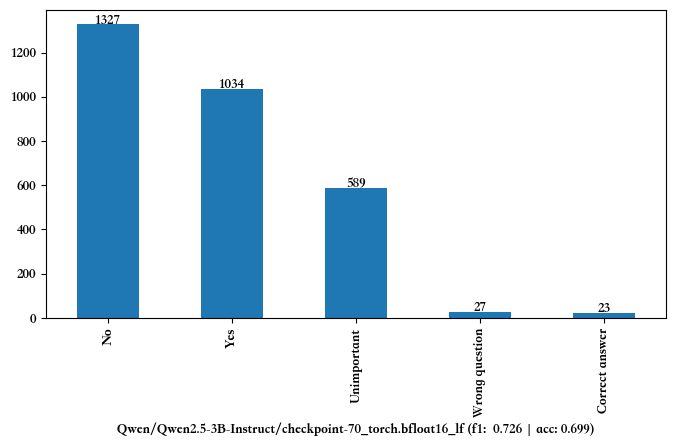

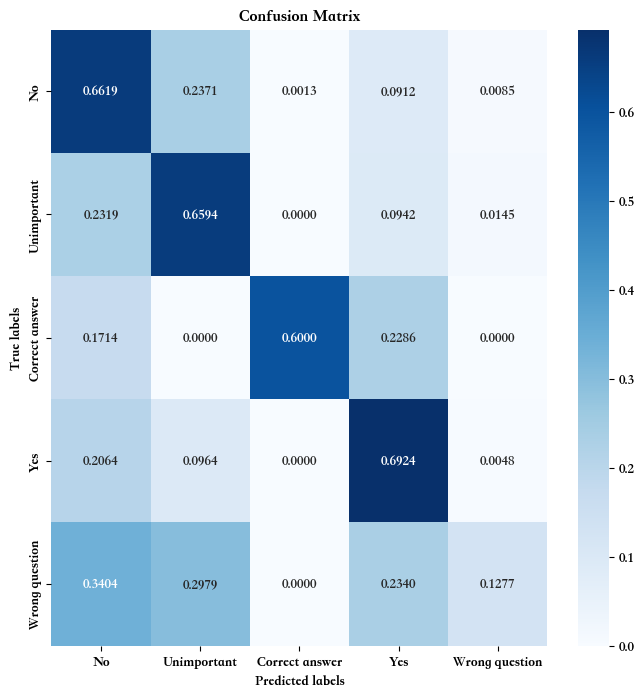

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-105_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-105_torch.bfloat16_lf
不是      1503
是       1015
不重要      411
问法错误      45
回答正确      26
Name: count, dtype: int64


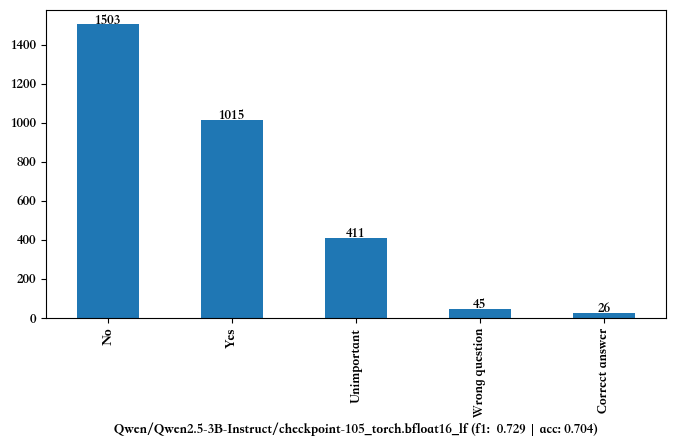

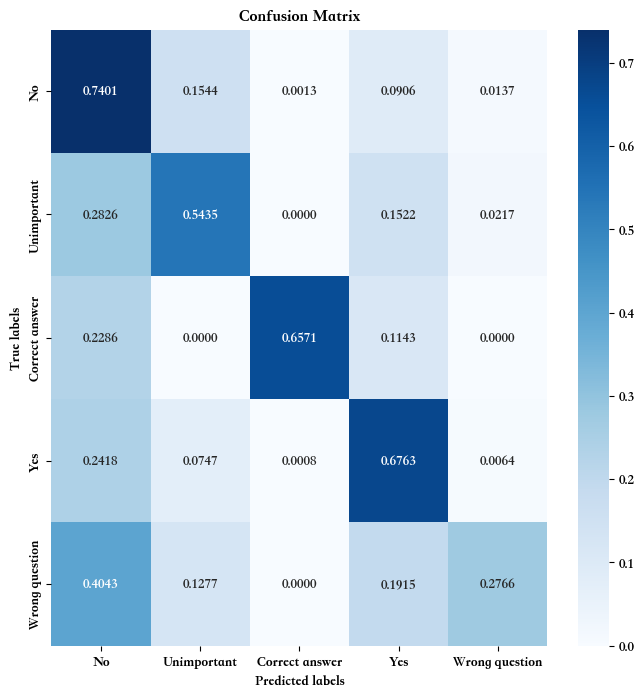

In [38]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-140_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-140_torch.bfloat16_lf
不是      1330
是       1145
不重要      425
问法错误      72
回答正确      28
Name: count, dtype: int64


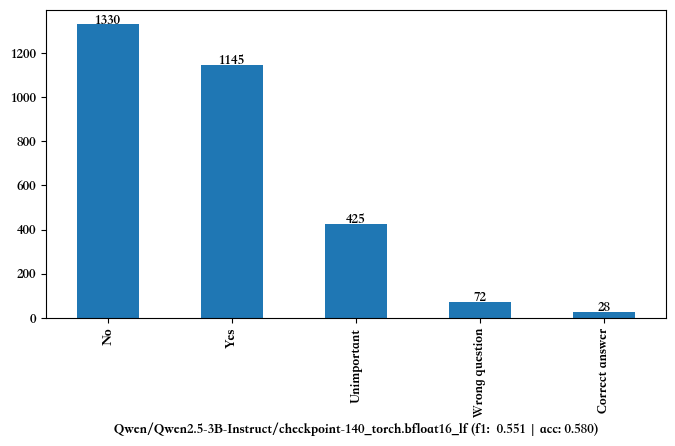

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-175_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-175_torch.bfloat16_lf
不是      1405
是       1056
不重要      470
问法错误      39
回答正确      30
Name: count, dtype: int64


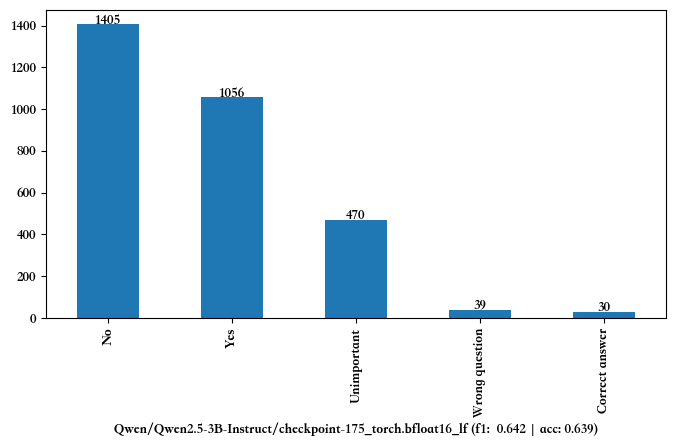

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-210_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-210_torch.bfloat16_lf
不是      1283
是       1099
不重要      528
问法错误      68
回答正确      22
Name: count, dtype: int64


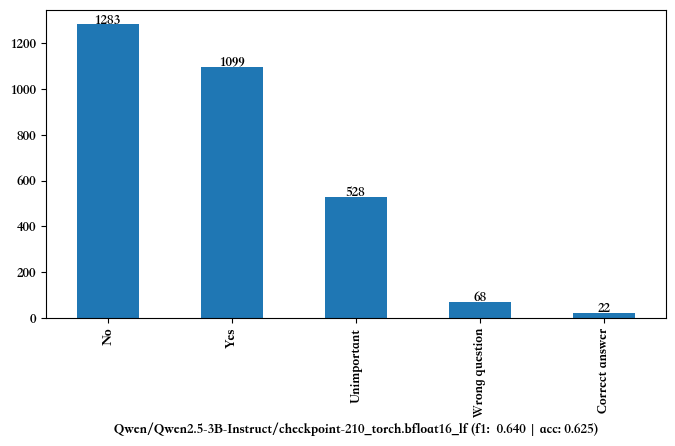

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-245_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-245_torch.bfloat16_lf
不是      1505
是       1057
不重要      376
问法错误      43
回答正确      19
Name: count, dtype: int64


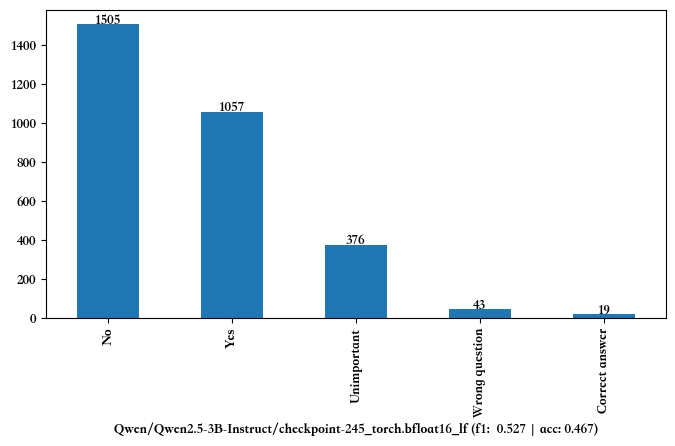

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-280_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-280_torch.bfloat16_lf
不是      1497
是       1022
不重要      409
问法错误      50
回答正确      22
Name: count, dtype: int64


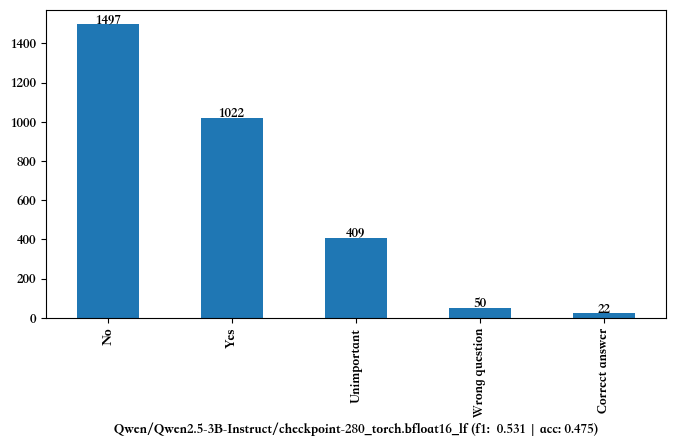

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-315_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-315_torch.bfloat16_lf
不是      1464
是        992
不重要      471
问法错误      49
回答正确      24
Name: count, dtype: int64


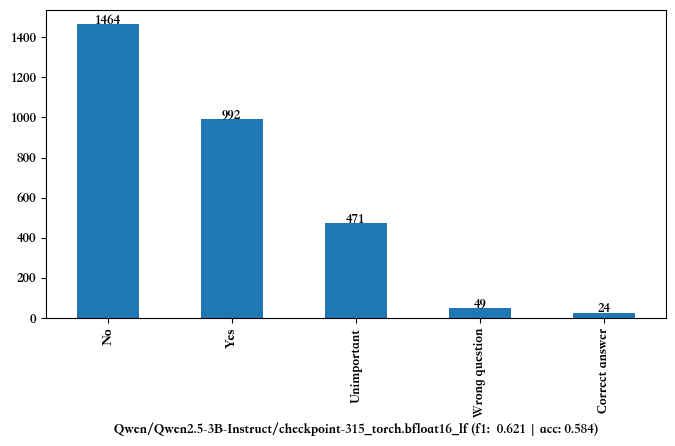

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-350_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-350_torch.bfloat16_lf
不是      1492
是        996
不重要      441
问法错误      51
回答正确      20
Name: count, dtype: int64


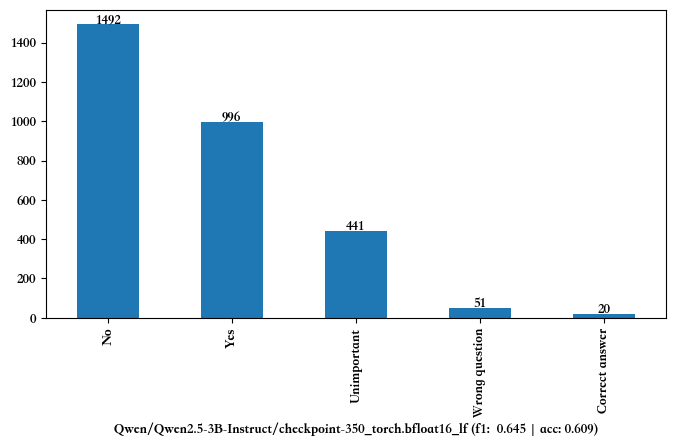

In [39]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
    )

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-140_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-140_torch.bfloat16_lf
不是      1330
是       1145
不重要      425
问法错误      72
回答正确      28
Name: count, dtype: int64


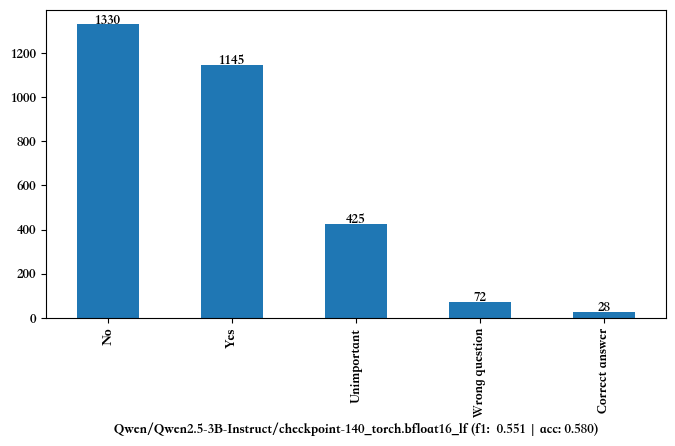

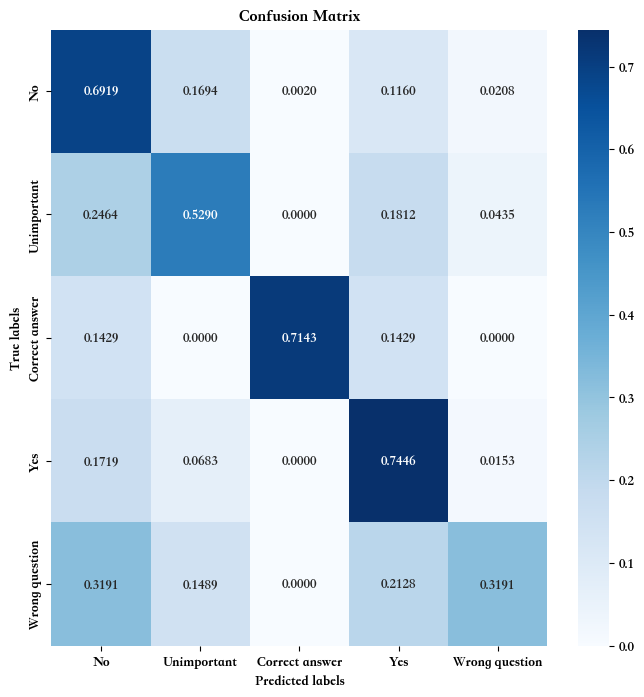

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-175_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-175_torch.bfloat16_lf
不是      1405
是       1056
不重要      470
问法错误      39
回答正确      30
Name: count, dtype: int64


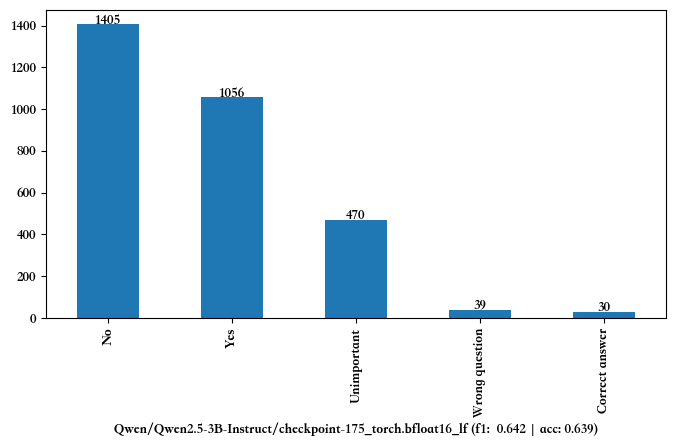

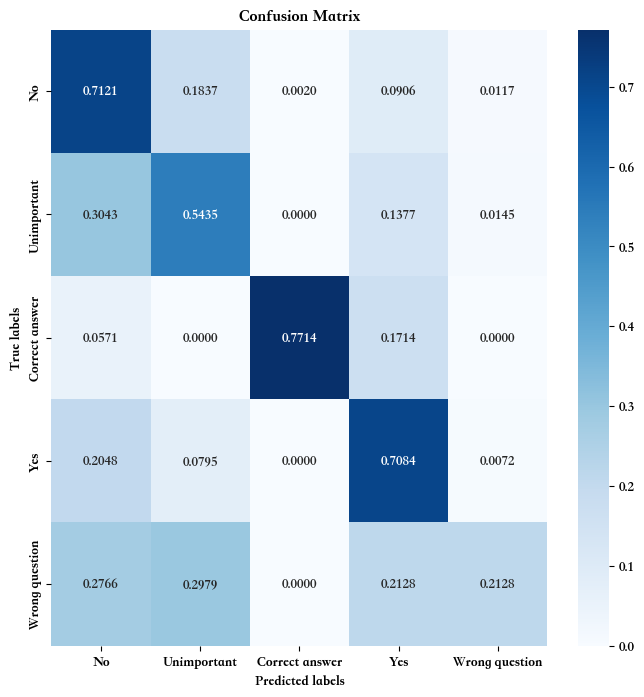

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-210_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-210_torch.bfloat16_lf
不是      1283
是       1099
不重要      528
问法错误      68
回答正确      22
Name: count, dtype: int64


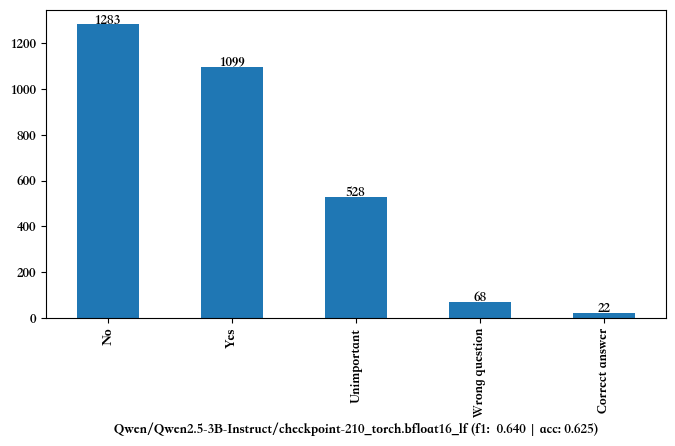

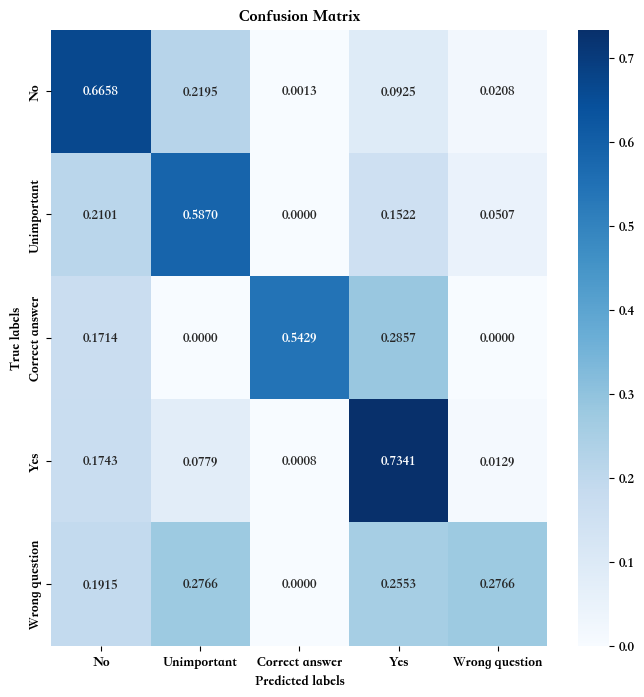

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-245_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-245_torch.bfloat16_lf
不是      1505
是       1057
不重要      376
问法错误      43
回答正确      19
Name: count, dtype: int64


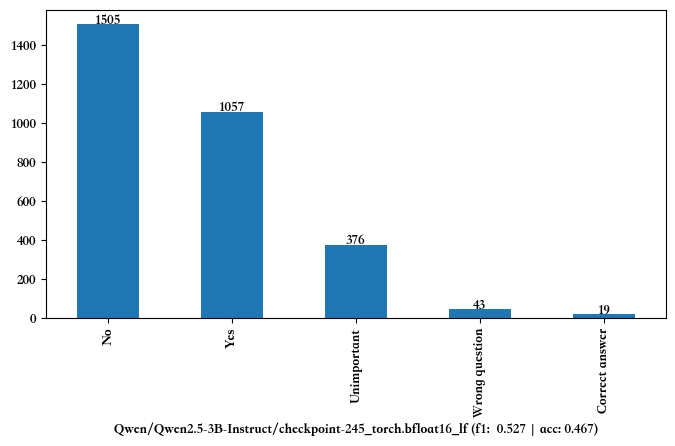

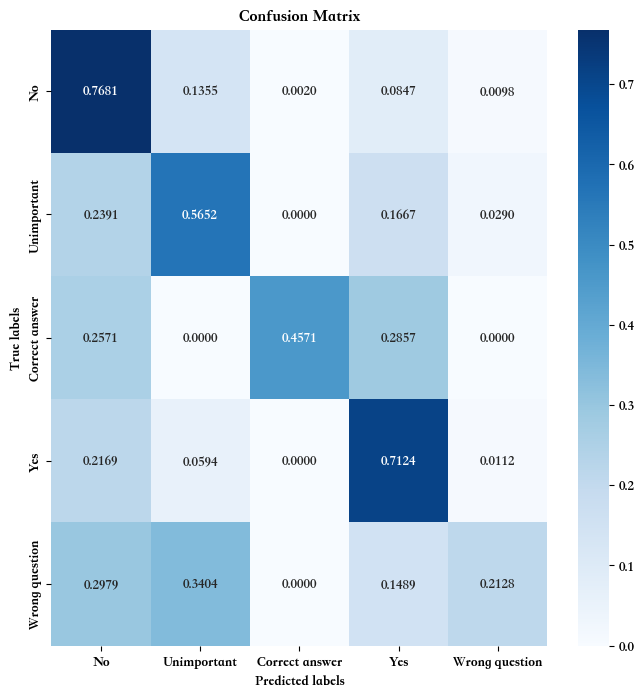

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-280_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-280_torch.bfloat16_lf
不是      1497
是       1022
不重要      409
问法错误      50
回答正确      22
Name: count, dtype: int64


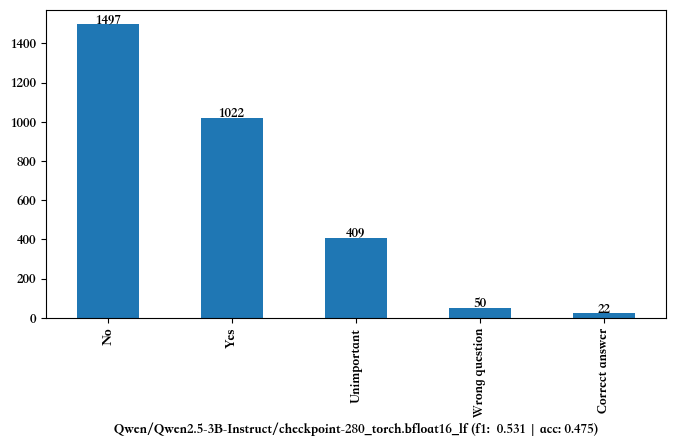

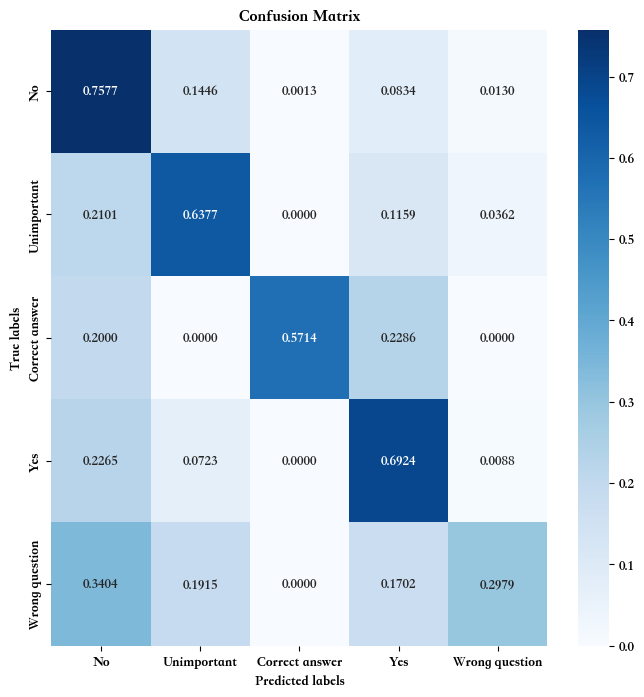

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-315_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-315_torch.bfloat16_lf
不是      1464
是        992
不重要      471
问法错误      49
回答正确      24
Name: count, dtype: int64


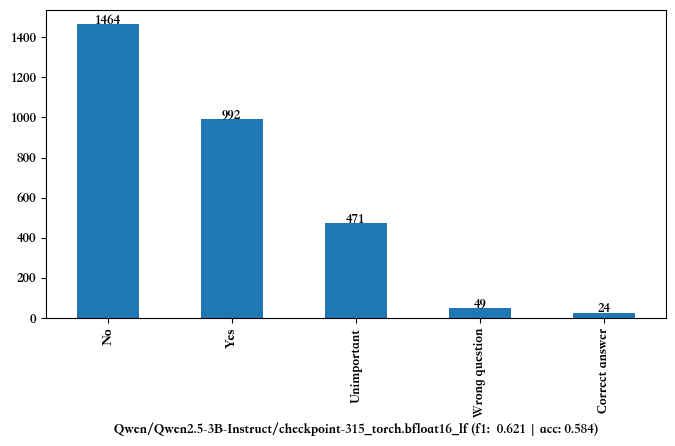

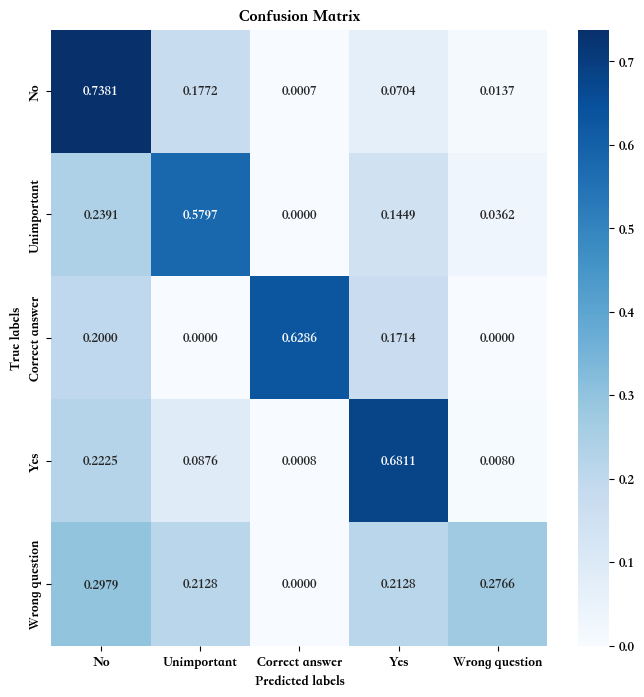

********** Qwen/Qwen2.5-3B-Instruct/checkpoint-350_torch.bfloat16_lf **********
Qwen/Qwen2.5-3B-Instruct/checkpoint-350_torch.bfloat16_lf
不是      1492
是        996
不重要      441
问法错误      51
回答正确      20
Name: count, dtype: int64


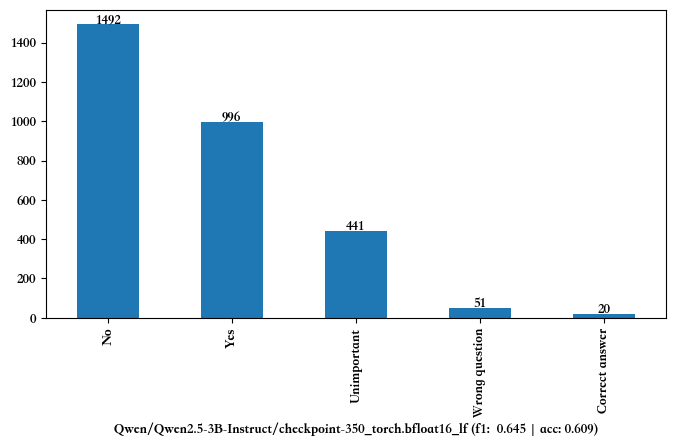

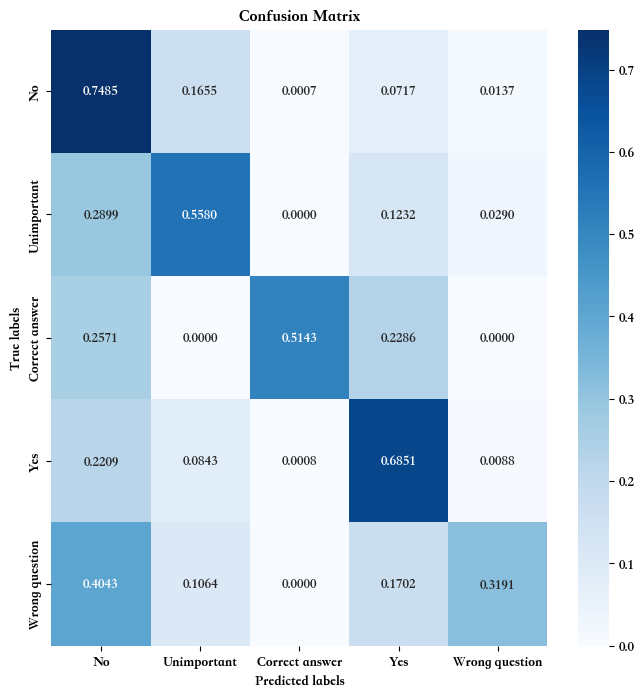

In [40]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )